In [379]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


file_path = Path('dec-2020') #replace with the path of where your data is stored
pd.set_option('display.max_columns', None)

# Load The Data
parse the dates

In [380]:
lab_results_df = pd.read_csv(file_path / 'LabResults_0.csv', sep = '\t', encoding = 'utf-16', parse_dates = ['created_at', 'tested_at', 'received_at'])
lab_results_df.head()

/Users/alienfoo/anaconda3/envs/cds_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (4,5,12,13,14,47,70,79,82,83,88,89,113,119,182) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,for_mme_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,received_at,type,foreign_matter,moisture_content_percent,herbicides_ppm,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_thcv_percent,cannabinoid_thcv_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbdv_mg_g,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,cannabinoid_cbga_percent,cannabinoid_cbga_mg_g,cannabinoid_cbc_percent,cannabinoid_cbc_mg_g,cannabinoid_cbn_percent,cannabinoid_cbn_mg_g,terpenoid_status,terpenoid_editor,terpenoid_bisabolol_percent,terpenoid_bisabolol_mg_g,terpenoid_humulene_percent,terpenoid_humulene_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,terpenoid_terpinolene_percent,terpenoid_terpinolene_mg_g,terpenoid_b_caryophyllene_percent,terpenoid_b_caryophyllene_mg_g,terpenoid_b_myrcene_percent,terpenoid_b_myrcene_mg_g,terpenoid_b_pinene_percent,terpenoid_b_pinene_mg_g,terpenoid_caryophyllene_oxide_percent,terpenoid_caryophyllene_oxide_mg_g,terpenoid_limonene_percent,terpenoid_limonene_mg_g,terpenoid_linalool_percent,terpenoid_linalool_mg_g,microbial_status,microbial_editor,microbial_total_viable_plate_count_cfu_g,microbial_total_yeast_mold_cfu_g,microbial_total_coliform_cfu_g,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,microbial_aerobic_bacteria_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_bifentrin_ppm,pesticide_captan_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_dimethomorph_ppm,pesticide_etoxazole_ppm,pesticide_fenhexamid_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_pcnb_ppm,pesticide_piperonyl_butoxide_ppm,pesticide_pyrethrin_ppm,pesticide_spinetoram_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,solvent_heptanes_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotet

In [381]:
lab_results_df.tail()

,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,for_mme_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,received_at,type,foreign_matter,moisture_content_percent,herbicides_ppm,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_thcv_percent,cannabinoid_thcv_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbdv_mg_g,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,cannabinoid_cbga_percent,cannabinoid_cbga_mg_g,cannabinoid_cbc_percent,cannabinoid_cbc_mg_g,cannabinoid_cbn_percent,cannabinoid_cbn_mg_g,terpenoid_status,terpenoid_editor,terpenoid_bisabolol_percent,terpenoid_bisabolol_mg_g,terpenoid_humulene_percent,terpenoid_humulene_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,terpenoid_terpinolene_percent,terpenoid_terpinolene_mg_g,terpenoid_b_caryophyllene_percent,terpenoid_b_caryophyllene_mg_g,terpenoid_b_myrcene_percent,terpenoid_b_myrcene_mg_g,terpenoid_b_pinene_percent,terpenoid_b_pinene_mg_g,terpenoid_caryophyllene_oxide_percent,terpenoid_caryophyllene_oxide_mg_g,terpenoid_limonene_percent,terpenoid_limonene_mg_g,terpenoid_linalool_percent,terpenoid_linalool_mg_g,microbial_status,microbial_editor,microbial_total_viable_plate_count_cfu_g,microbial_total_yeast_mold_cfu_g,microbial_total_coliform_cfu_g,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,microbial_aerobic_bacteria_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_bifentrin_ppm,pesticide_captan_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_dimethomorph_ppm,pesticide_etoxazole_ppm,pesticide_fenhexamid_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_pcnb_ppm,pesticide_piperonyl_butoxide_ppm,pesticide_pyrethrin_ppm,pesticide_spinetoram_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,solvent_heptanes_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotet

# Function Definitions

In [382]:
# Round the data to days
def round_to_days(df):
    df['days'] = df.testing_time.dt.round('1D').dt.days

In [383]:
def plot_results(df):
    fig, axes = plt.subplots(2, 2, figsize = (20, 20))
    plt.suptitle('Days To Test')
    ax = axes[0,0]
    ax.set_xlabel('Days')
    ax.set(frame_on = False)
    df.hist(ax = ax, column = 'days', grid = False)
    ax.set_title('')
    ax = axes[0,1]
    ax.set(frame_on = False)
    df.boxplot(ax = axes[0,1], column = 'days', grid = False)
    ax = axes[1,0]
    ax.set(frame_on = False)
    df.plot.line(ax = axes[1,0], x = 'created_at', y = "days")
    ax = axes[1,1]
    ax.set(frame_on = False)
    df.plot.scatter(ax = axes[1,1], x = 'created_at', y = 'days')
   

Calculate statistics for a slice of the data.  Store it for comparisson.

In [384]:
stats_df = pd.DataFrame(columns = ['key', 'count', 'median', 'mean', 'min', 'first', 'second', 'third', 'max', 'kurtosis', 'skew'])
def calculate_stats(data, stats, key):
    stats = stats.append({'key': key,
                     'count': data.days.count(),
                     'median': data.days.median(),
                     'mean': data.days.mean(),
                     'min': data.days.min(),
                     'first': data.days.quantile(0.25),
                     'second': data.days.quantile(0.5),
                     'third': data.days.quantile(0.75),
                     'max': data.days.max(),
                     'kurtosis': data.days.kurt(),
                     'skew': data.days.skew()},
                      ignore_index=True )
    return stats

# Calculate The Testing Time
We should be able to calculate the testing time by subtracting the receieved at time from the tested at time

In [385]:
lab_results_df['testing_time'] = lab_results_df.tested_at - lab_results_df.received_at
round_to_days(lab_results_df)

In [386]:
stats_df = calculate_stats(lab_results_df, stats_df, 'all_data')
stats_df

,key,count,median,mean,min,first,second,third,max,kurtosis,skew
0,all_data,1993093,43659.0,39954.798105,-43352,43659.0,43659.0,43660.0,45978,8.88398,-3.173674


# Look at all of the data

In [387]:
lab_results_df.testing_time.describe()

count                          1993093
mean     39954 days 19:39:04.589733376
std      12347 days 07:35:35.971038848
min              -43352 days +09:04:00
25%                43658 days 22:18:58
50%                43659 days 07:43:40
75%                43659 days 17:09:03
max                45978 days 10:07:00
Name: testing_time, dtype: object

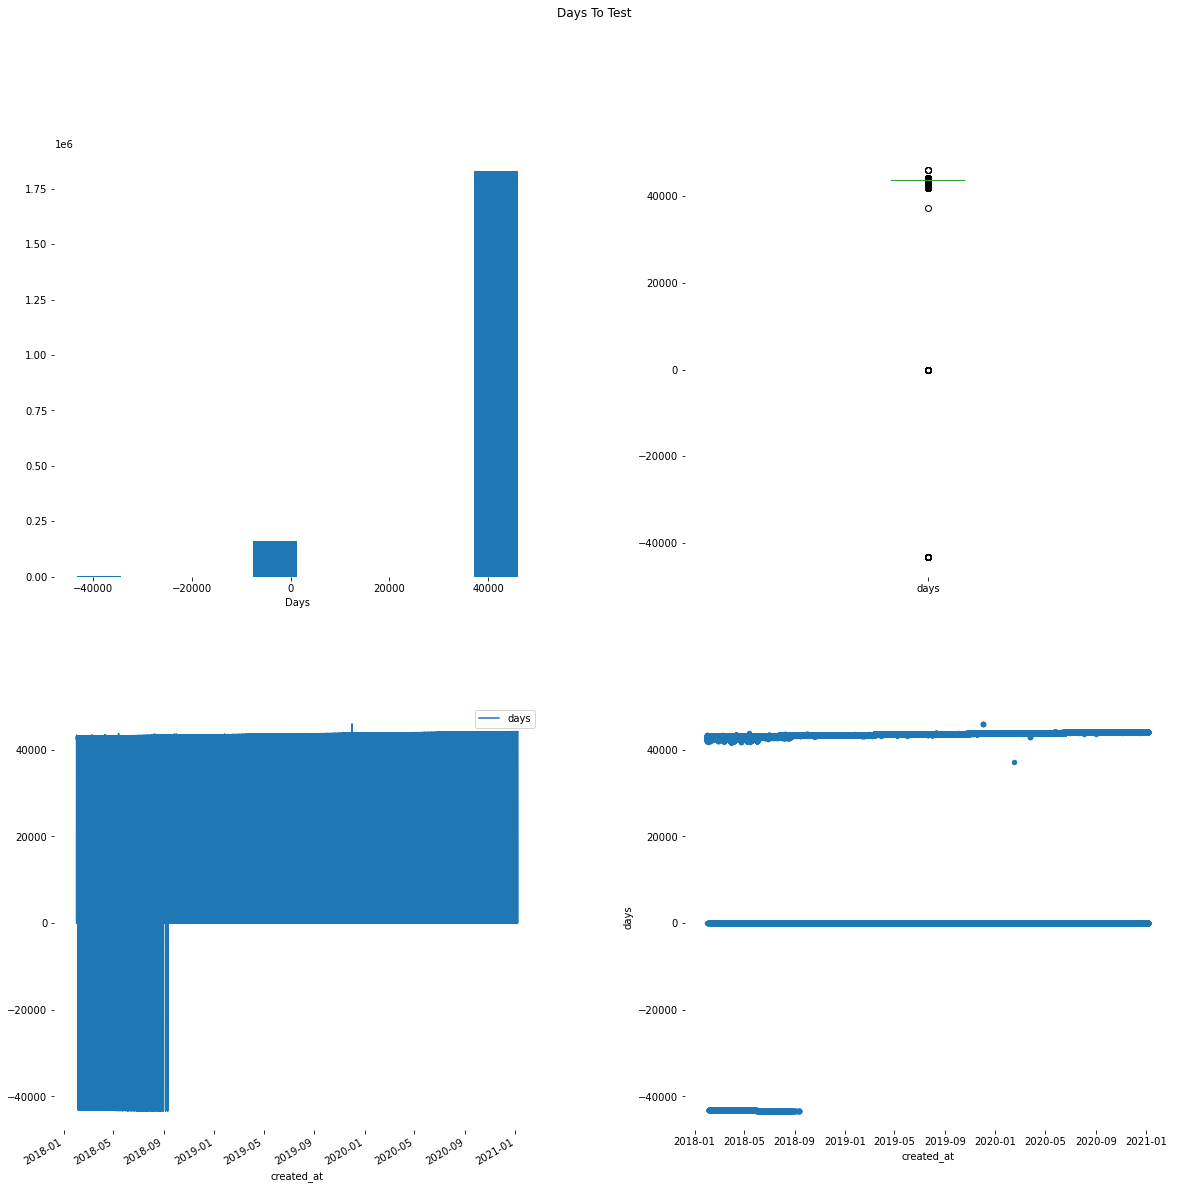

In [388]:
plot_results(lab_results_df)

# Remove incorrect dates
There are a large number of rows where received at and tested at are 1900-01-01

In [389]:
testing_times_df = lab_results_df[(lab_results_df.received_at != pd.Timestamp(1900, 1, 1)) & (lab_results_df.tested_at != pd.Timestamp(1900, 1, 1))]

Removing those rows, removes almost all the rows and yields no information.  Received at is not in the Leaf documentation so maybe it is not used or has been depreciated.

In [390]:
testing_times_df.days.describe()

count    1191.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: days, dtype: float64

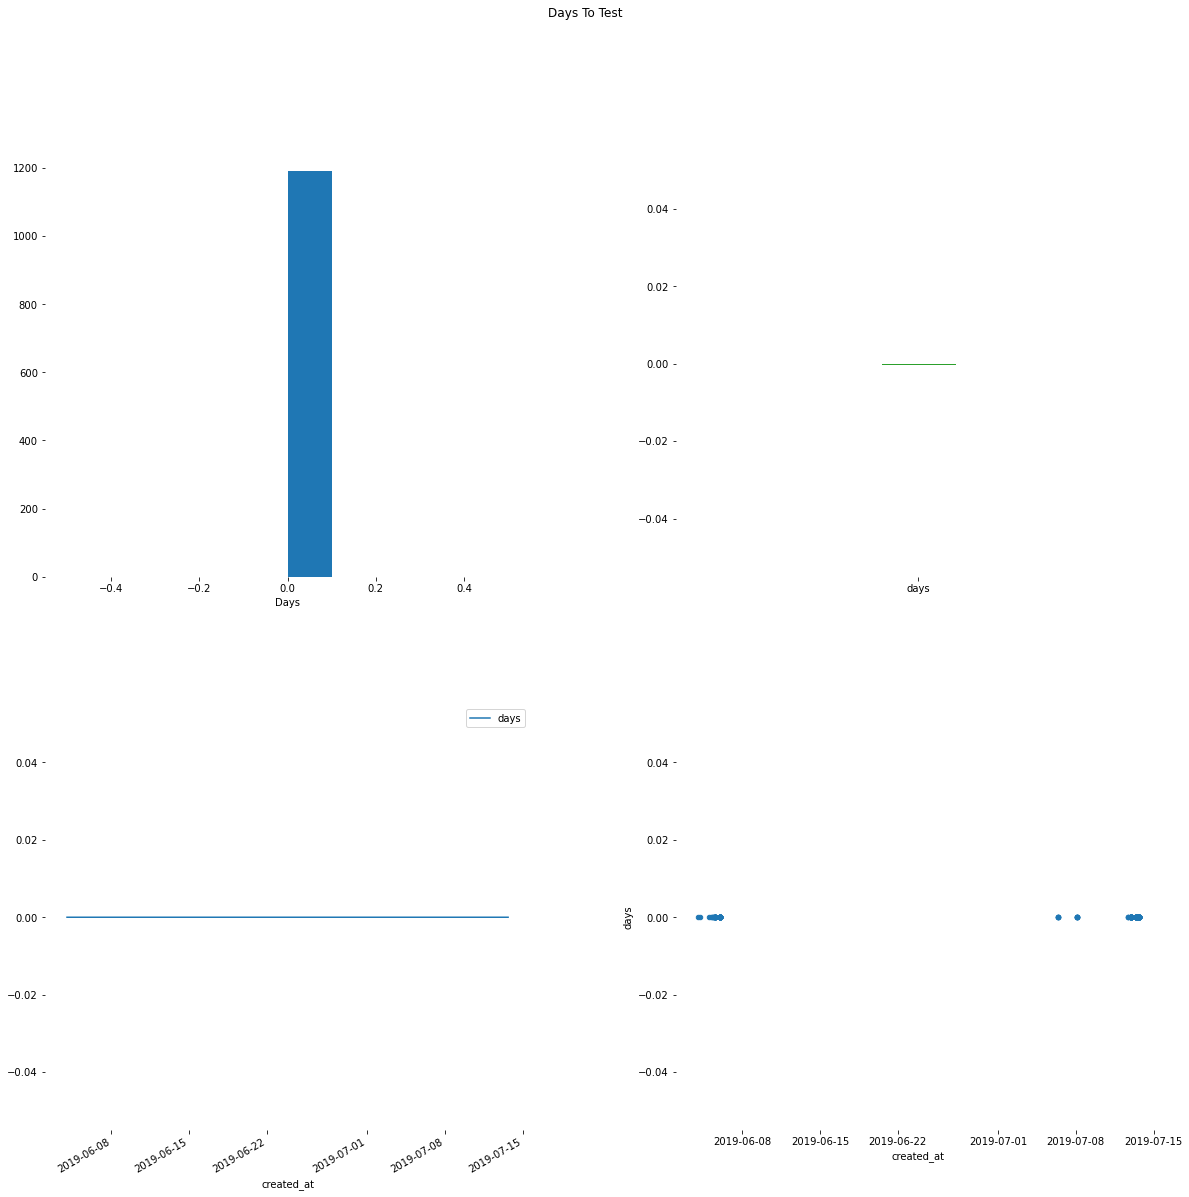

In [391]:
plot_results(testing_times_df)

# Using Created At instead of Received At
Can we use the created at field as the received at time?  Many of the created at times are after the testing time so we will only use the rows where created at is before tested at.
This assumes that the record was created at the time that the sample was recieved which may not be the case.

In [392]:
testing_times_df = lab_results_df[(lab_results_df.tested_at != pd.Timestamp(1900, 1, 1)) & (lab_results_df.tested_at.dt.date > lab_results_df.created_at.dt.date)].copy()

In [393]:
testing_times_df

,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,for_mme_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,received_at,type,foreign_matter,moisture_content_percent,herbicides_ppm,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_thcv_percent,cannabinoid_thcv_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbdv_mg_g,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,cannabinoid_cbga_percent,cannabinoid_cbga_mg_g,cannabinoid_cbc_percent,cannabinoid_cbc_mg_g,cannabinoid_cbn_percent,cannabinoid_cbn_mg_g,terpenoid_status,terpenoid_editor,terpenoid_bisabolol_percent,terpenoid_bisabolol_mg_g,terpenoid_humulene_percent,terpenoid_humulene_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,terpenoid_terpinolene_percent,terpenoid_terpinolene_mg_g,terpenoid_b_caryophyllene_percent,terpenoid_b_caryophyllene_mg_g,terpenoid_b_myrcene_percent,terpenoid_b_myrcene_mg_g,terpenoid_b_pinene_percent,terpenoid_b_pinene_mg_g,terpenoid_caryophyllene_oxide_percent,terpenoid_caryophyllene_oxide_mg_g,terpenoid_limonene_percent,terpenoid_limonene_mg_g,terpenoid_linalool_percent,terpenoid_linalool_mg_g,microbial_status,microbial_editor,microbial_total_viable_plate_count_cfu_g,microbial_total_yeast_mold_cfu_g,microbial_total_coliform_cfu_g,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,microbial_aerobic_bacteria_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_bifentrin_ppm,pesticide_captan_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_dimethomorph_ppm,pesticide_etoxazole_ppm,pesticide_fenhexamid_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_pcnb_ppm,pesticide_piperonyl_butoxide_ppm,pesticide_pyrethrin_ppm,pesticide_spinetoram_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,solvent_heptanes_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotet

# Calculate the testing time
Calculate the testing time by subtracting the created at time from the tested at time

In [394]:
testing_times_df['testing_time'] = lab_results_df.tested_at - lab_results_df.created_at
round_to_days(testing_times_df)

In [395]:
testing_times_df

,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,for_mme_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,received_at,type,foreign_matter,moisture_content_percent,herbicides_ppm,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_thcv_percent,cannabinoid_thcv_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbdv_mg_g,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,cannabinoid_cbga_percent,cannabinoid_cbga_mg_g,cannabinoid_cbc_percent,cannabinoid_cbc_mg_g,cannabinoid_cbn_percent,cannabinoid_cbn_mg_g,terpenoid_status,terpenoid_editor,terpenoid_bisabolol_percent,terpenoid_bisabolol_mg_g,terpenoid_humulene_percent,terpenoid_humulene_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,terpenoid_terpinolene_percent,terpenoid_terpinolene_mg_g,terpenoid_b_caryophyllene_percent,terpenoid_b_caryophyllene_mg_g,terpenoid_b_myrcene_percent,terpenoid_b_myrcene_mg_g,terpenoid_b_pinene_percent,terpenoid_b_pinene_mg_g,terpenoid_caryophyllene_oxide_percent,terpenoid_caryophyllene_oxide_mg_g,terpenoid_limonene_percent,terpenoid_limonene_mg_g,terpenoid_linalool_percent,terpenoid_linalool_mg_g,microbial_status,microbial_editor,microbial_total_viable_plate_count_cfu_g,microbial_total_yeast_mold_cfu_g,microbial_total_coliform_cfu_g,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,microbial_aerobic_bacteria_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_bifentrin_ppm,pesticide_captan_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_dimethomorph_ppm,pesticide_etoxazole_ppm,pesticide_fenhexamid_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_pcnb_ppm,pesticide_piperonyl_butoxide_ppm,pesticide_pyrethrin_ppm,pesticide_spinetoram_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,solvent_heptanes_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotet

In [396]:
stats_df = calculate_stats(testing_times_df, stats_df, 'Created At')
stats_df

,key,count,median,mean,min,first,second,third,max,kurtosis,skew
0,all_data,1993093,43659.0,39954.798105,-43352,43659.0,43659.0,43660.0,45978,8.883980,-3.173674
1,Created At,3190,2.0,15.831034,1,2.0,2.0,4.0,2180,445.580399,18.887317


In [397]:
testing_times_df['days'].describe()

count    3190.000000
mean       15.831034
std        88.629483
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max      2180.000000
Name: days, dtype: float64

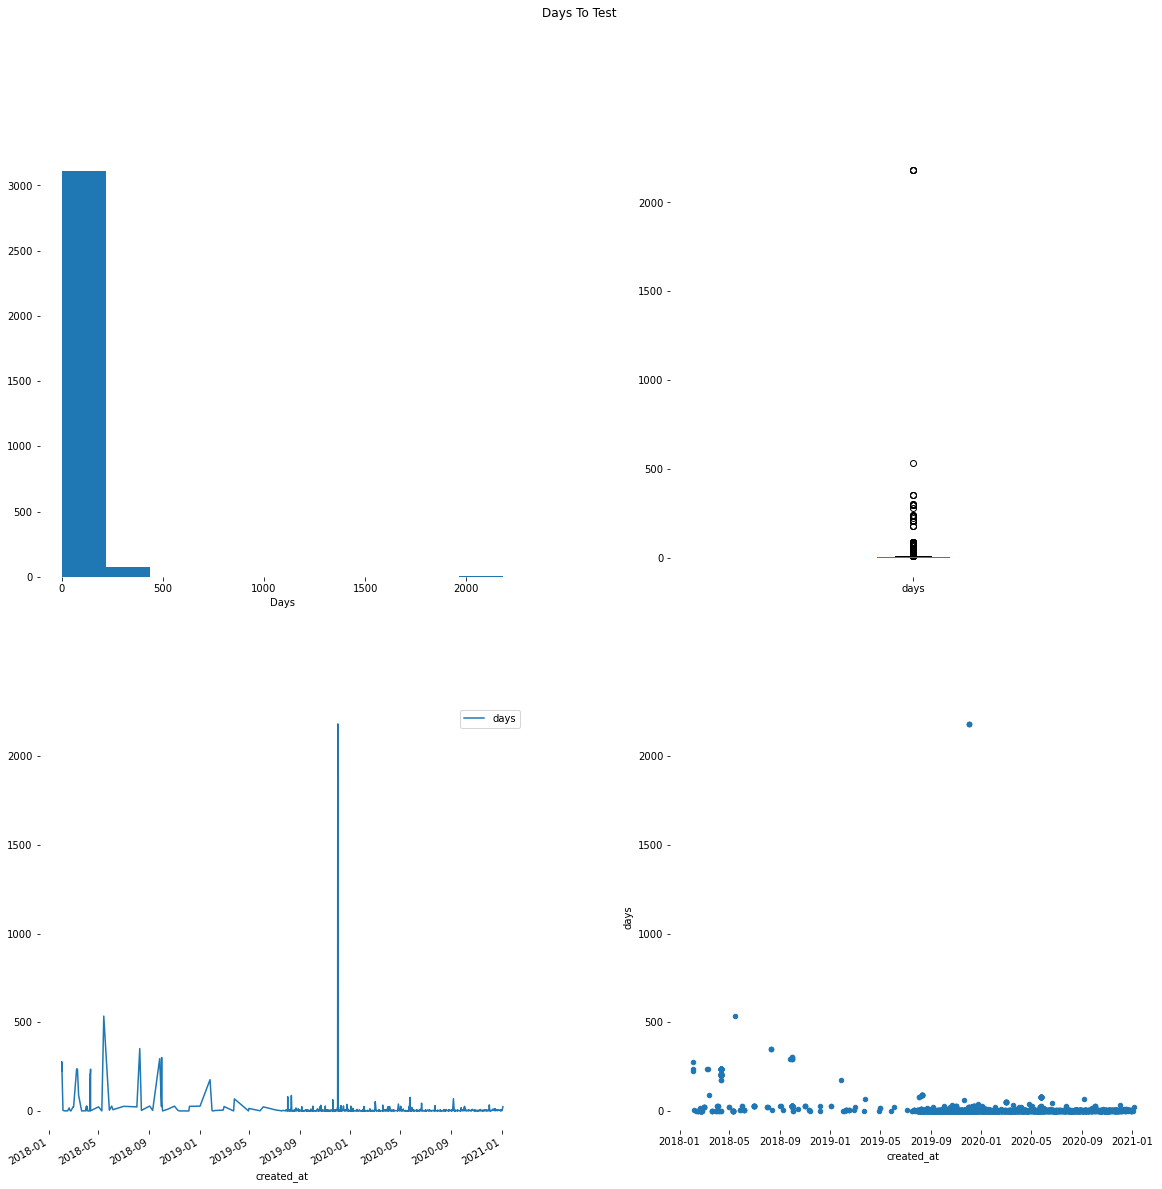

In [398]:
plot_results(testing_times_df)

# Remove Outliers

In [399]:
testing_times_df['days'].describe()

count    3190.000000
mean       15.831034
std        88.629483
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max      2180.000000
Name: days, dtype: float64

In [400]:
testing_times_df['testing_time'].value_counts().head(50)

1 days 23:59:33    15
1 days 23:59:41    15
3 days 23:59:49    14
2 days 09:44:41    14
3 days 23:59:10    14
1 days 23:59:52    13
1 days 08:59:37    12
1 days 09:44:45    12
1 days 23:59:43    12
3 days 23:59:08    12
3 days 23:59:50    12
4 days 23:59:54    11
4 days 23:59:52    11
1 days 23:59:07    11
4 days 23:59:57    10
1 days 23:59:36    10
2 days 09:44:40     9
1 days 08:29:41     9
1 days 09:44:44     9
1 days 08:59:38     9
2 days 08:44:42     9
2 days 23:59:43     9
1 days 23:59:45     8
1 days 09:44:46     8
3 days 23:59:47     8
1 days 23:59:09     8
2 days 23:59:16     8
1 days 09:59:45     8
1 days 08:29:37     8
1 days 08:59:36     8
4 days 23:59:53     8
1 days 09:29:37     8
4 days 23:59:42     8
2 days 23:59:25     8
3 days 23:59:43     8
1 days 23:59:37     7
2 days 23:59:27     7
2 days 23:59:56     7
2 days 08:59:22     7
1 days 23:59:50     7
2 days 23:59:15     7
2 days 08:29:42     7
1 days 23:59:56     7
2 days 08:59:29     7
2 days 01:15:17     7
4 days 09:

In [401]:
testing_times_df['testing_time'].value_counts().tail(50)

3 days 08:29:37      1
6 days 10:37:28      1
1 days 12:31:08      1
3 days 03:37:09      1
2 days 11:44:44      1
5 days 05:43:54      1
3 days 07:19:21      1
2 days 10:29:42      1
2 days 06:33:03      1
28 days 22:58:37     1
5 days 23:59:48      1
2 days 09:14:03      1
2 days 03:13:53      1
2 days 03:14:17      1
3 days 07:18:32      1
3 days 12:14:40      1
24 days 23:48:30     1
5 days 23:57:32      1
1 days 18:33:19      1
1 days 12:26:36      1
3 days 07:24:44      1
238 days 07:41:44    1
1 days 08:59:50      1
2 days 11:44:37      1
28 days 22:59:08     1
1 days 12:29:41      1
18 days 03:40:34     1
70 days 05:35:31     1
25 days 23:57:22     1
0 days 16:14:43      1
25 days 23:57:38     1
4 days 23:59:03      1
2 days 13:59:42      1
3 days 22:59:09      1
7 days 06:39:07      1
13 days 01:31:11     1
3 days 13:15:41      1
8 days 23:59:24      1
5 days 23:59:41      1
3 days 07:20:21      1
2 days 23:59:59      1
1 days 09:59:39      1
1 days 12:26:37      1
4 days 05:1

# What is an appropriate cutoff time?
90 days, 60 days or 30 days?

# Cutoff at 90 Days

In [402]:
valid_testing_times_df = testing_times_df[testing_times_df['days'] <= 90].copy()

In [403]:
valid_testing_times_df.reset_index(inplace = True)

In [404]:
stats_df = calculate_stats(valid_testing_times_df, stats_df, '90')
stats_df

,key,count,median,mean,min,first,second,third,max,kurtosis,skew
0,all_data,1993093,43659.0,39954.798105,-43352,43659.0,43659.0,43660.0,45978,8.883980,-3.173674
1,Created At,3190,2.0,15.831034,1,2.0,2.0,4.0,2180,445.580399,18.887317
2,90,3074,2.0,4.990566,1,2.0,2.0,4.0,90,36.121740,5.662720


In [405]:
valid_testing_times_df.days.describe()

count    3074.000000
mean        4.990566
std        10.288559
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        90.000000
Name: days, dtype: float64

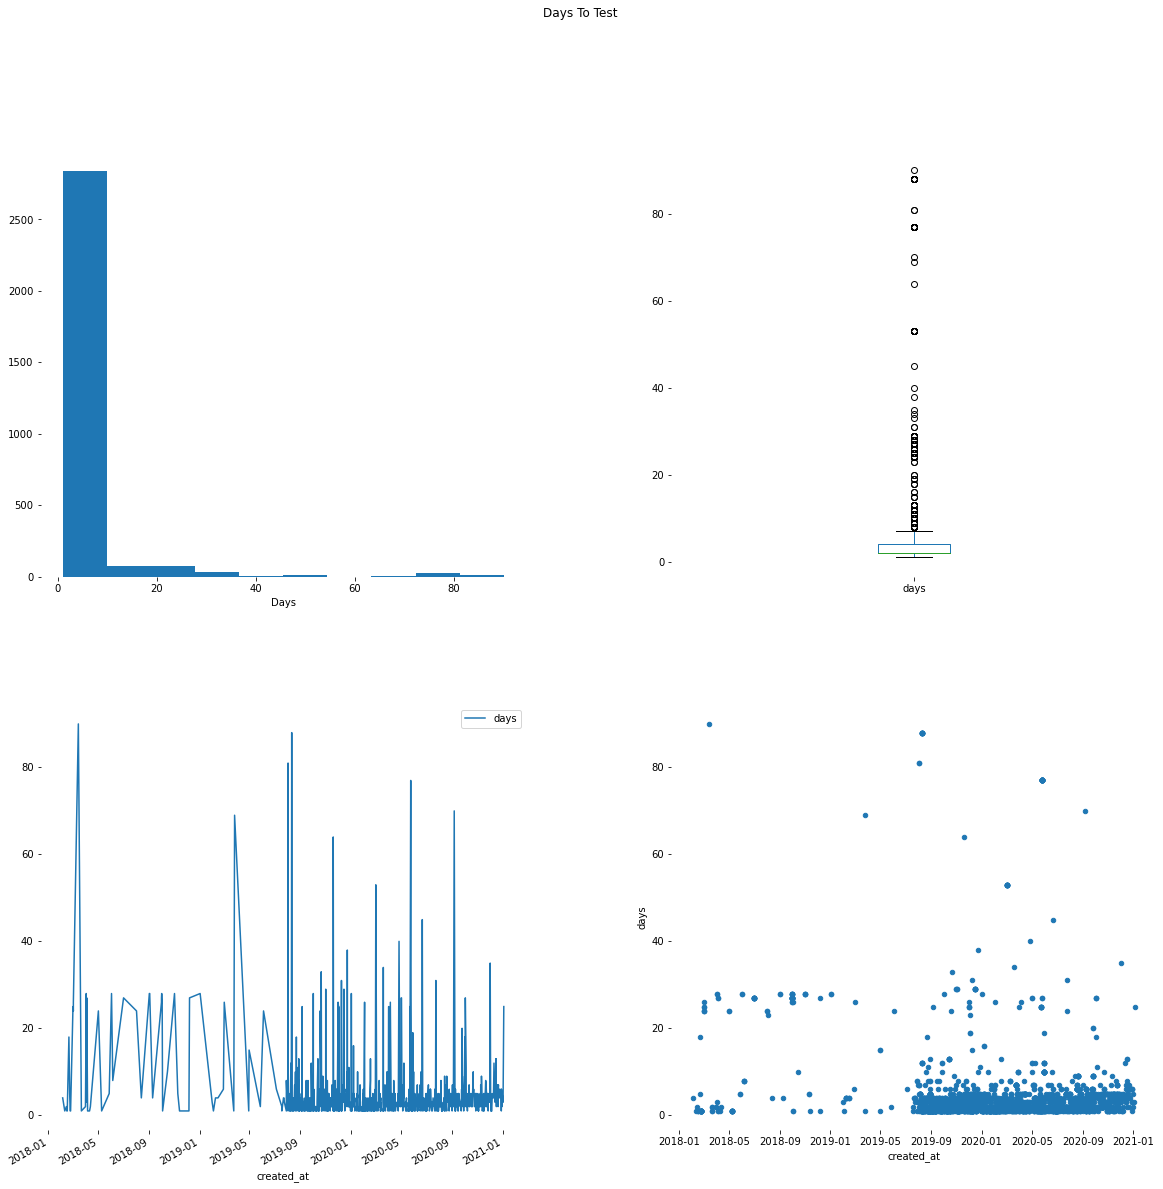

In [406]:
plot_results(valid_testing_times_df)

# Cutoff at 60 Days

In [407]:
valid_testing_times_df = testing_times_df[testing_times_df['days'] <= 60].copy()

In [408]:
valid_testing_times_df.reset_index(inplace = True)

In [409]:
stats_df = calculate_stats(valid_testing_times_df, stats_df, '60')
stats_df

,key,count,median,mean,min,first,second,third,max,kurtosis,skew
0,all_data,1993093,43659.0,39954.798105,-43352,43659.0,43659.0,43660.0,45978,8.883980,-3.173674
1,Created At,3190,2.0,15.831034,1,2.0,2.0,4.0,2180,445.580399,18.887317
2,90,3074,2.0,4.990566,1,2.0,2.0,4.0,90,36.121740,5.662720
3,60,3035,2.0,4.031301,1,2.0,2.0,4.0,53,23.935803,4.450030


In [410]:
valid_testing_times_df.days.describe()

count    3035.000000
mean        4.031301
std         5.847491
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        53.000000
Name: days, dtype: float64

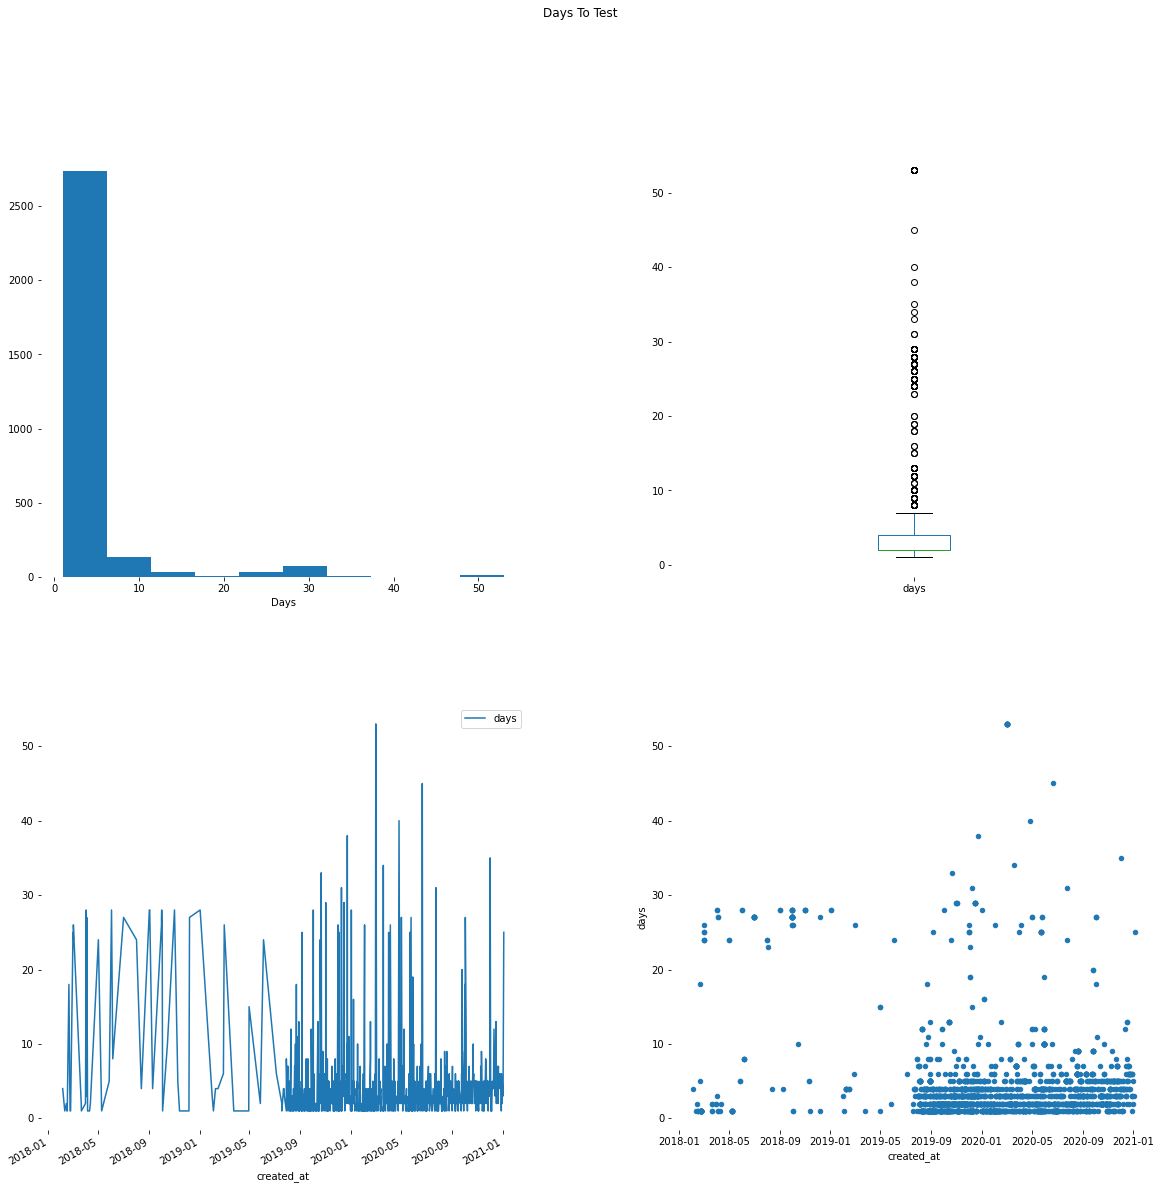

In [411]:
plot_results(valid_testing_times_df)

# Cutoff at 35 Days

In [412]:
valid_testing_times_df = testing_times_df[testing_times_df['days'] <= 35].copy()

In [413]:
valid_testing_times_df.reset_index(inplace = True)

In [414]:
stats_df = calculate_stats(valid_testing_times_df, stats_df, '35')
stats_df

,key,count,median,mean,min,first,second,third,max,kurtosis,skew
0,all_data,1993093,43659.0,39954.798105,-43352,43659.0,43659.0,43660.0,45978,8.883980,-3.173674
1,Created At,3190,2.0,15.831034,1,2.0,2.0,4.0,2180,445.580399,18.887317
2,90,3074,2.0,4.990566,1,2.0,2.0,4.0,90,36.121740,5.662720
3,60,3035,2.0,4.031301,1,2.0,2.0,4.0,53,23.935803,4.450030
4,35,3022,2.0,3.832561,1,2.0,2.0,4.0,35,14.594351,3.747679


In [415]:
valid_testing_times_df['days'].describe()

count    3022.000000
mean        3.832561
std         4.999744
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        35.000000
Name: days, dtype: float64

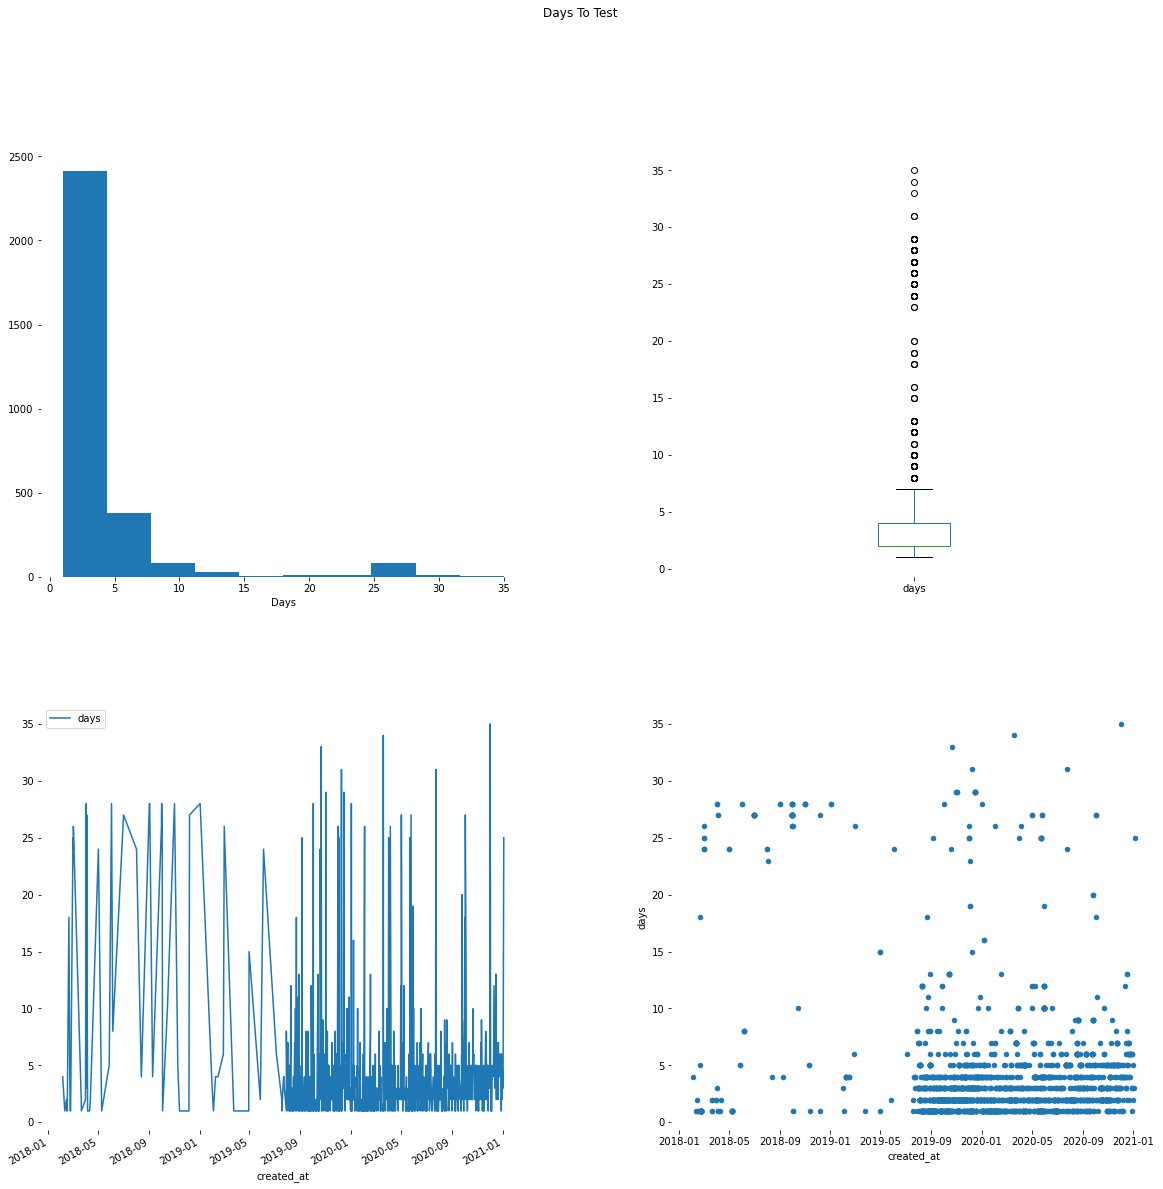

In [416]:
plot_results(valid_testing_times_df)

# Comparison
Assuming that the at date is the date that the sample was received, then removing the outliers has no effect on the median, min, 25th, 50th and 75th percentile.

In [417]:
stats_df

,key,count,median,mean,min,first,second,third,max,kurtosis,skew
0,all_data,1993093,43659.0,39954.798105,-43352,43659.0,43659.0,43660.0,45978,8.883980,-3.173674
1,Created At,3190,2.0,15.831034,1,2.0,2.0,4.0,2180,445.580399,18.887317
2,90,3074,2.0,4.990566,1,2.0,2.0,4.0,90,36.121740,5.662720
3,60,3035,2.0,4.031301,1,2.0,2.0,4.0,53,23.935803,4.450030
4,35,3022,2.0,3.832561,1,2.0,2.0,4.0,35,14.594351,3.747679


# Can we learn anything by looking at test times by product type?

In [418]:
testing_times_df.type.unique()

array(['harvest_materials', 'intermediate_product', 'marijuana',
       'end_product'], dtype=object)

# Marijuana

In [419]:
marijuana_df = testing_times_df[testing_times_df.type == 'marijuana']
marijuana_df

,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,for_mme_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,received_at,type,foreign_matter,moisture_content_percent,herbicides_ppm,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_thcv_percent,cannabinoid_thcv_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbdv_mg_g,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,cannabinoid_cbga_percent,cannabinoid_cbga_mg_g,cannabinoid_cbc_percent,cannabinoid_cbc_mg_g,cannabinoid_cbn_percent,cannabinoid_cbn_mg_g,terpenoid_status,terpenoid_editor,terpenoid_bisabolol_percent,terpenoid_bisabolol_mg_g,terpenoid_humulene_percent,terpenoid_humulene_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,terpenoid_terpinolene_percent,terpenoid_terpinolene_mg_g,terpenoid_b_caryophyllene_percent,terpenoid_b_caryophyllene_mg_g,terpenoid_b_myrcene_percent,terpenoid_b_myrcene_mg_g,terpenoid_b_pinene_percent,terpenoid_b_pinene_mg_g,terpenoid_caryophyllene_oxide_percent,terpenoid_caryophyllene_oxide_mg_g,terpenoid_limonene_percent,terpenoid_limonene_mg_g,terpenoid_linalool_percent,terpenoid_linalool_mg_g,microbial_status,microbial_editor,microbial_total_viable_plate_count_cfu_g,microbial_total_yeast_mold_cfu_g,microbial_total_coliform_cfu_g,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,microbial_aerobic_bacteria_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_bifentrin_ppm,pesticide_captan_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_dimethomorph_ppm,pesticide_etoxazole_ppm,pesticide_fenhexamid_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_pcnb_ppm,pesticide_piperonyl_butoxide_ppm,pesticide_pyrethrin_ppm,pesticide_spinetoram_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,solvent_heptanes_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotet

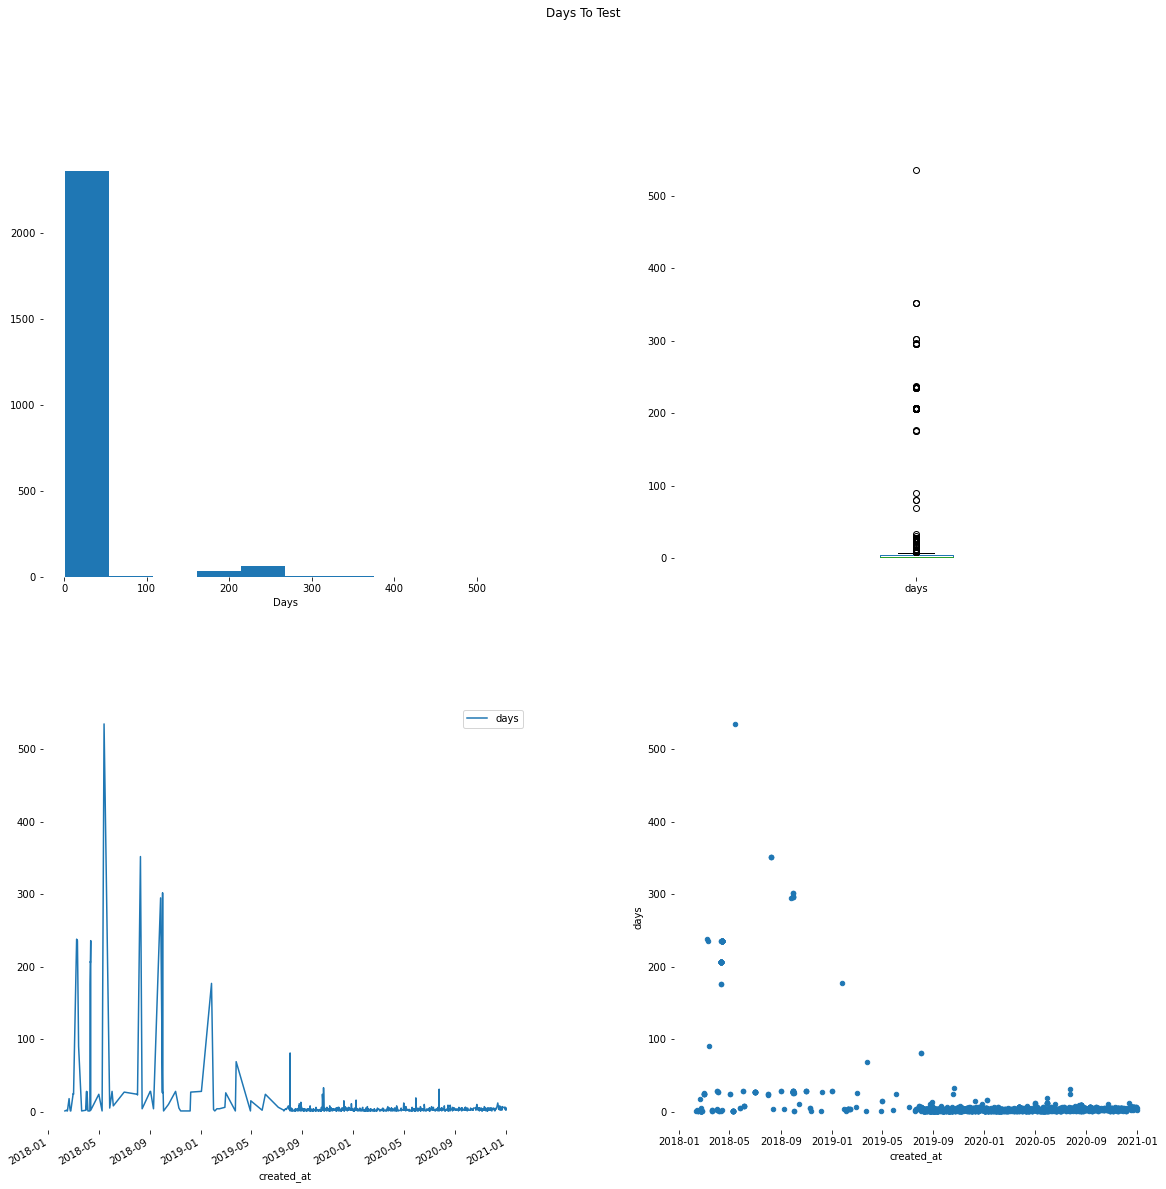

In [420]:
plot_results(marijuana_df)

In [421]:
stats_df = calculate_stats(marijuana_df, stats_df, 'marijuana')
stats_df

,key,count,median,mean,min,first,second,third,max,kurtosis,skew
0,all_data,1993093,43659.0,39954.798105,-43352,43659.0,43659.0,43660.0,45978,8.883980,-3.173674
1,Created At,3190,2.0,15.831034,1,2.0,2.0,4.0,2180,445.580399,18.887317
2,90,3074,2.0,4.990566,1,2.0,2.0,4.0,90,36.121740,5.662720
3,60,3035,2.0,4.031301,1,2.0,2.0,4.0,53,23.935803,4.450030
4,35,3022,2.0,3.832561,1,2.0,2.0,4.0,35,14.594351,3.747679
5,marijuana,2471,2.0,13.844193,1,2.0,2.0,4.0,535,22.694394,4.710970


# Intermediate Product

In [422]:
intermediate_product_df = testing_times_df[testing_times_df.type == 'intermediate_product']
intermediate_product_df

,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,for_mme_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,received_at,type,foreign_matter,moisture_content_percent,herbicides_ppm,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_thcv_percent,cannabinoid_thcv_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbdv_mg_g,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,cannabinoid_cbga_percent,cannabinoid_cbga_mg_g,cannabinoid_cbc_percent,cannabinoid_cbc_mg_g,cannabinoid_cbn_percent,cannabinoid_cbn_mg_g,terpenoid_status,terpenoid_editor,terpenoid_bisabolol_percent,terpenoid_bisabolol_mg_g,terpenoid_humulene_percent,terpenoid_humulene_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,terpenoid_terpinolene_percent,terpenoid_terpinolene_mg_g,terpenoid_b_caryophyllene_percent,terpenoid_b_caryophyllene_mg_g,terpenoid_b_myrcene_percent,terpenoid_b_myrcene_mg_g,terpenoid_b_pinene_percent,terpenoid_b_pinene_mg_g,terpenoid_caryophyllene_oxide_percent,terpenoid_caryophyllene_oxide_mg_g,terpenoid_limonene_percent,terpenoid_limonene_mg_g,terpenoid_linalool_percent,terpenoid_linalool_mg_g,microbial_status,microbial_editor,microbial_total_viable_plate_count_cfu_g,microbial_total_yeast_mold_cfu_g,microbial_total_coliform_cfu_g,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,microbial_aerobic_bacteria_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_bifentrin_ppm,pesticide_captan_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_dimethomorph_ppm,pesticide_etoxazole_ppm,pesticide_fenhexamid_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_pcnb_ppm,pesticide_piperonyl_butoxide_ppm,pesticide_pyrethrin_ppm,pesticide_spinetoram_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,solvent_heptanes_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotet

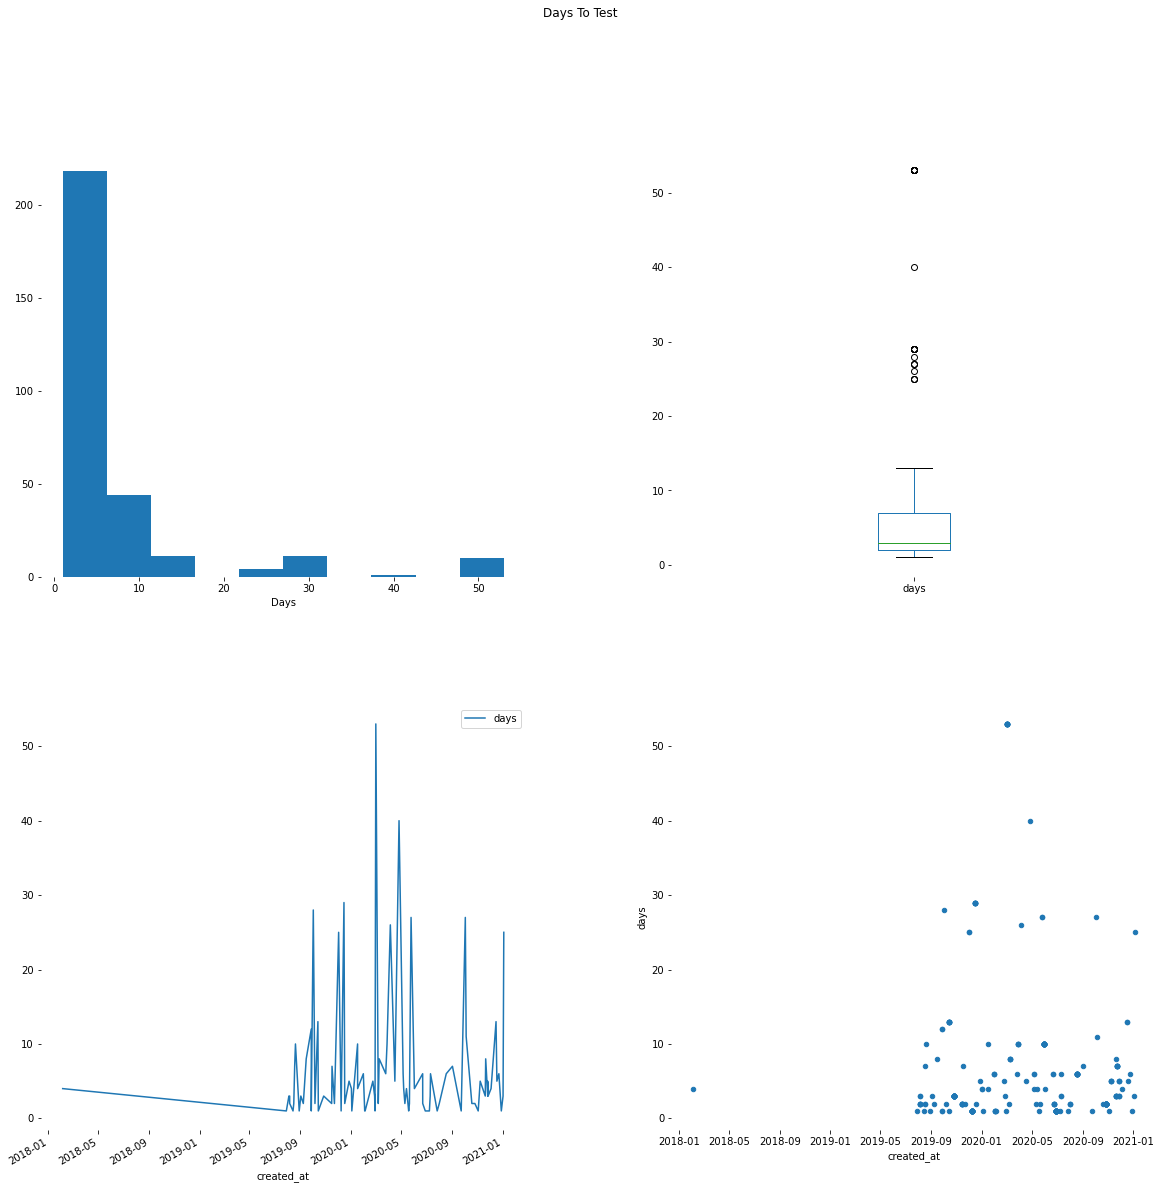

In [423]:
plot_results(intermediate_product_df)

In [424]:
stats_df = calculate_stats(intermediate_product_df, stats_df, 'intermediate_product')
stats_df

,key,count,median,mean,min,first,second,third,max,kurtosis,skew
0,all_data,1993093,43659.0,39954.798105,-43352,43659.0,43659.0,43660.0,45978,8.883980,-3.173674
1,Created At,3190,2.0,15.831034,1,2.0,2.0,4.0,2180,445.580399,18.887317
2,90,3074,2.0,4.990566,1,2.0,2.0,4.0,90,36.121740,5.662720
3,60,3035,2.0,4.031301,1,2.0,2.0,4.0,53,23.935803,4.450030
4,35,3022,2.0,3.832561,1,2.0,2.0,4.0,35,14.594351,3.747679
5,marijuana,2471,2.0,13.844193,1,2.0,2.0,4.0,535,22.694394,4.710970
6,intermediate_product,299,3.0,6.913043,1,2.0,3.0,7.0,53,9.754393,3.091939


# Harvest Materials

In [425]:
harvest_materials_df = testing_times_df[testing_times_df.type == 'harvest_materials']
harvest_materials_df

,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,for_mme_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,received_at,type,foreign_matter,moisture_content_percent,herbicides_ppm,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_thcv_percent,cannabinoid_thcv_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbdv_mg_g,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,cannabinoid_cbga_percent,cannabinoid_cbga_mg_g,cannabinoid_cbc_percent,cannabinoid_cbc_mg_g,cannabinoid_cbn_percent,cannabinoid_cbn_mg_g,terpenoid_status,terpenoid_editor,terpenoid_bisabolol_percent,terpenoid_bisabolol_mg_g,terpenoid_humulene_percent,terpenoid_humulene_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,terpenoid_terpinolene_percent,terpenoid_terpinolene_mg_g,terpenoid_b_caryophyllene_percent,terpenoid_b_caryophyllene_mg_g,terpenoid_b_myrcene_percent,terpenoid_b_myrcene_mg_g,terpenoid_b_pinene_percent,terpenoid_b_pinene_mg_g,terpenoid_caryophyllene_oxide_percent,terpenoid_caryophyllene_oxide_mg_g,terpenoid_limonene_percent,terpenoid_limonene_mg_g,terpenoid_linalool_percent,terpenoid_linalool_mg_g,microbial_status,microbial_editor,microbial_total_viable_plate_count_cfu_g,microbial_total_yeast_mold_cfu_g,microbial_total_coliform_cfu_g,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,microbial_aerobic_bacteria_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_bifentrin_ppm,pesticide_captan_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_dimethomorph_ppm,pesticide_etoxazole_ppm,pesticide_fenhexamid_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_pcnb_ppm,pesticide_piperonyl_butoxide_ppm,pesticide_pyrethrin_ppm,pesticide_spinetoram_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,solvent_heptanes_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotet

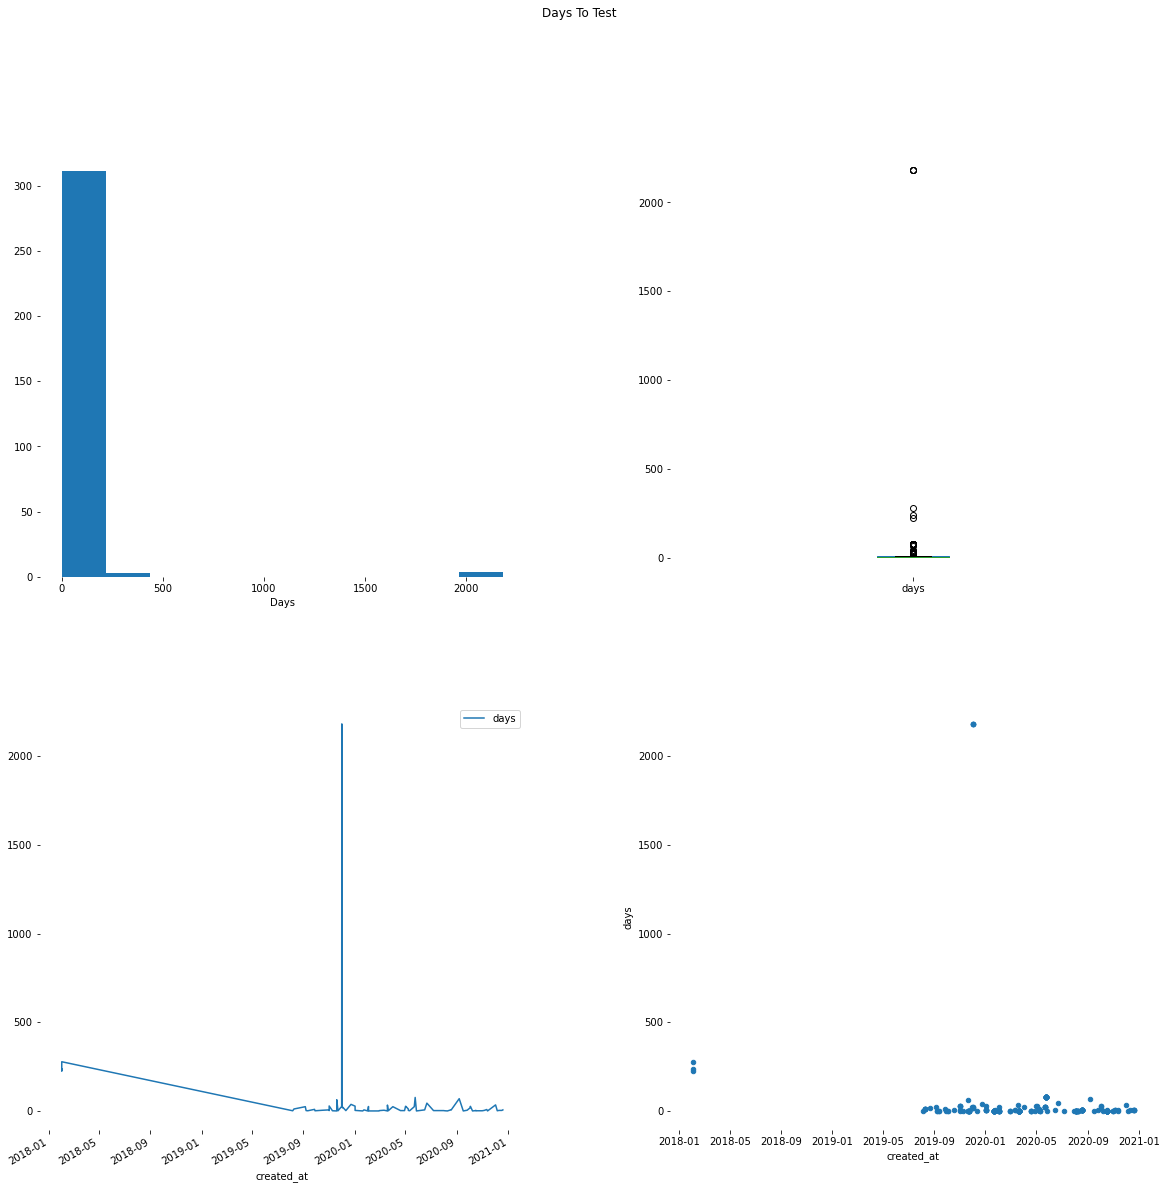

In [426]:
plot_results(harvest_materials_df)

In [427]:
stats_df = calculate_stats(harvest_materials_df, stats_df, 'harvest_materials')
stats_df

,key,count,median,mean,min,first,second,third,max,kurtosis,skew
0,all_data,1993093,43659.0,39954.798105,-43352,43659.0,43659.0,43660.0,45978,8.883980,-3.173674
1,Created At,3190,2.0,15.831034,1,2.0,2.0,4.0,2180,445.580399,18.887317
2,90,3074,2.0,4.990566,1,2.0,2.0,4.0,90,36.121740,5.662720
3,60,3035,2.0,4.031301,1,2.0,2.0,4.0,53,23.935803,4.450030
4,35,3022,2.0,3.832561,1,2.0,2.0,4.0,35,14.594351,3.747679
5,marijuana,2471,2.0,13.844193,1,2.0,2.0,4.0,535,22.694394,4.710970
6,intermediate_product,299,3.0,6.913043,1,2.0,3.0,7.0,53,9.754393,3.091939
7,harvest_materials,318,3.0,40.735849,1,2.0,3.0,7.0,2180,73.243073,8.584861


# End Product

In [428]:
end_product_df = testing_times_df[testing_times_df.type == 'end_product']
end_product_df

,global_id,created_at,mme_id,user_id,external_id,deleted_at,inventory_id,updated_at,status,testing_status,batch_id,for_mme_id,parent_lab_result_id,og_parent_lab_result_id,copied_from_lab_id,lab_user_id,tested_at,received_at,type,foreign_matter,moisture_content_percent,herbicides_ppm,growth_regulators_ppm,cannabinoid_status,cannabinoid_editor,cannabinoid_d9_thca_percent,cannabinoid_d9_thca_mg_g,cannabinoid_d9_thc_percent,cannabinoid_d9_thc_mg_g,cannabinoid_d8_thc_percent,cannabinoid_d8_thc_mg_g,cannabinoid_thcv_percent,cannabinoid_thcv_mg_g,cannabinoid_cbd_percent,cannabinoid_cbd_mg_g,cannabinoid_cbda_percent,cannabinoid_cbda_mg_g,cannabinoid_cbdv_percent,cannabinoid_cbdv_mg_g,cannabinoid_cbg_percent,cannabinoid_cbg_mg_g,cannabinoid_cbga_percent,cannabinoid_cbga_mg_g,cannabinoid_cbc_percent,cannabinoid_cbc_mg_g,cannabinoid_cbn_percent,cannabinoid_cbn_mg_g,terpenoid_status,terpenoid_editor,terpenoid_bisabolol_percent,terpenoid_bisabolol_mg_g,terpenoid_humulene_percent,terpenoid_humulene_mg_g,terpenoid_pinene_percent,terpenoid_pinene_mg_g,terpenoid_terpinolene_percent,terpenoid_terpinolene_mg_g,terpenoid_b_caryophyllene_percent,terpenoid_b_caryophyllene_mg_g,terpenoid_b_myrcene_percent,terpenoid_b_myrcene_mg_g,terpenoid_b_pinene_percent,terpenoid_b_pinene_mg_g,terpenoid_caryophyllene_oxide_percent,terpenoid_caryophyllene_oxide_mg_g,terpenoid_limonene_percent,terpenoid_limonene_mg_g,terpenoid_linalool_percent,terpenoid_linalool_mg_g,microbial_status,microbial_editor,microbial_total_viable_plate_count_cfu_g,microbial_total_yeast_mold_cfu_g,microbial_total_coliform_cfu_g,microbial_bile_tolerant_cfu_g,microbial_pathogenic_e_coli_cfu_g,microbial_salmonella_cfu_g,microbial_aerobic_bacteria_cfu_g,mycotoxin_status,mycotoxin_editor,mycotoxin_aflatoxins_ppb,mycotoxin_ochratoxin_ppb,metal_status,metal_editor,metal_arsenic_ppm,metal_cadmium_ppm,metal_lead_ppm,metal_mercury_ppm,pesticide_status,pesticide_editor,pesticide_abamectin_ppm,pesticide_acequinocyl_ppm,pesticide_bifenazate_ppm,pesticide_bifentrin_ppm,pesticide_captan_ppm,pesticide_cyfluthrin_ppm,pesticide_cypermethrin_ppm,pesticide_dimethomorph_ppm,pesticide_etoxazole_ppm,pesticide_fenhexamid_ppm,pesticide_flonicamid_ppm,pesticide_fludioxonil_ppm,pesticide_imidacloprid_ppm,pesticide_myclobutanil_ppm,pesticide_pcnb_ppm,pesticide_piperonyl_butoxide_ppm,pesticide_pyrethrin_ppm,pesticide_spinetoram_ppm,pesticide_spinosad_ppm,pesticide_spirotetramet_ppm,pesticide_thiamethoxam_ppm,pesticide_trifloxystrobin_ppm,solvent_status,solvent_editor,solvent_butanes_ppm,solvent_heptane_ppm,solvent_propane_ppm,notes,thc_percent,intermediate_type,moisture_content_water_activity_rate,solvent_acetone_ppm,solvent_benzene_ppm,solvent_cyclohexane_ppm,solvent_chloroform_ppm,solvent_dichloromethane_ppm,solvent_ethyl_acetate_ppm,solvent_hexanes_ppm,solvent_isopropanol_ppm,solvent_methanol_ppm,solvent_pentanes_ppm,solvent_toluene_ppm,solvent_xylene_ppm,solvent_heptanes_ppm,pesticide_acephate_ppm,pesticide_acetamiprid_ppm,pesticide_aldicarb_ppm,pesticide_azoxystrobin_ppm,pesticide_bifenthrin_ppm,pesticide_boscalid_ppm,pesticide_carbaryl_ppm,pesticide_carbofuran_ppm,pesticide_chlorantraniliprole_ppm,pesticide_chlorfenapyr_ppm,pesticide_chlorpyrifos_ppm,pesticide_clofentezine_ppm,pesticide_daminozide_ppm,pesticide_ddvp_dichlorvos_ppm,pesticide_diazinon_ppm,pesticide_dimethoate_ppm,pesticide_ethoprophos_ppm,pesticide_etofenprox_ppm,pesticide_fenoxycarb_ppm,pesticide_fenpyroximate_ppm,pesticide_fipronil_ppm,pesticide_hexythiazox_ppm,pesticide_imazalil_ppm,pesticide_kresoxim_methyl_ppm,pesticide_malathion_ppm,pesticide_metalaxyl_ppm,pesticide_methiocarb_ppm,pesticide_methomyl_ppm,pesticide_methyl_parathion_ppm,pesticide_mgk_264_ppm,pesticide_naled_ppm,pesticide_oxamyl_ppm,pesticide_paclobutrazol_ppm,pesticide_permethrinsa_ppm,pesticide_phosmet_ppm,pesticide_prallethrin_ppm,pesticide_propiconazole_ppm,pesticide_propoxur_ppm,pesticide_pyrethrinsbc_ppm,pesticide_pyridaben_ppm,pesticide_spiromesifen_ppm,pesticide_spirotet

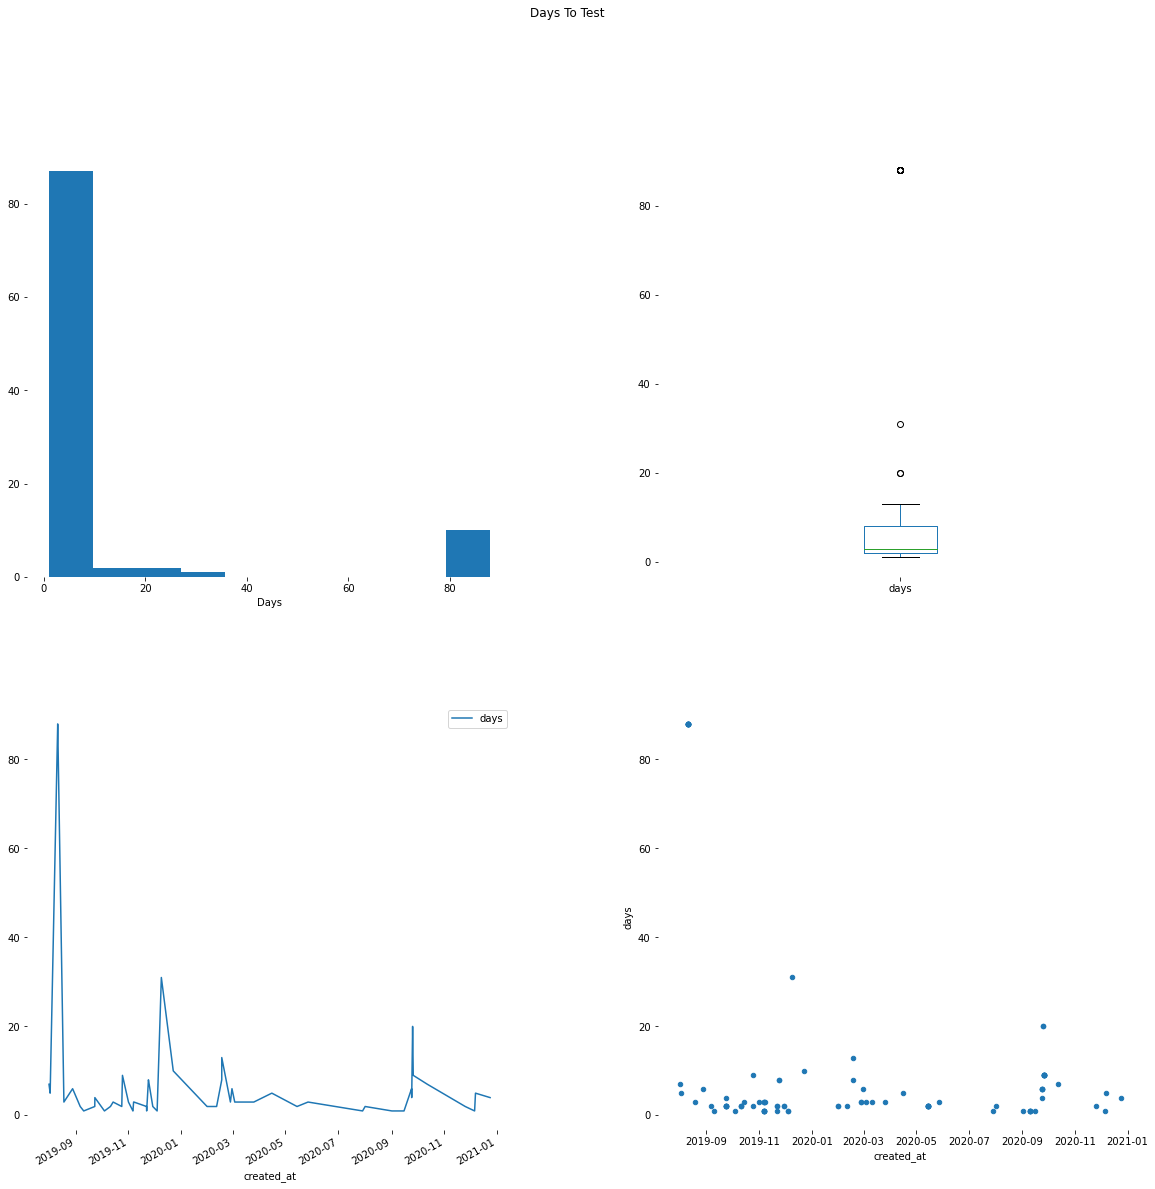

In [429]:
plot_results(end_product_df)

# Comparison

In [430]:
stats_df = calculate_stats(end_product_df, stats_df, 'end_product')
stats_df

,key,count,median,mean,min,first,second,third,max,kurtosis,skew
0,all_data,1993093,43659.0,39954.798105,-43352,43659.0,43659.0,43660.0,45978,8.883980,-3.173674
1,Created At,3190,2.0,15.831034,1,2.0,2.0,4.0,2180,445.580399,18.887317
2,90,3074,2.0,4.990566,1,2.0,2.0,4.0,90,36.121740,5.662720
3,60,3035,2.0,4.031301,1,2.0,2.0,4.0,53,23.935803,4.450030
4,35,3022,2.0,3.832561,1,2.0,2.0,4.0,35,14.594351,3.747679
5,marijuana,2471,2.0,13.844193,1,2.0,2.0,4.0,535,22.694394,4.710970
6,intermediate_product,299,3.0,6.913043,1,2.0,3.0,7.0,53,9.754393,3.091939
7,harvest_materials,318,3.0,40.735849,1,2.0,3.0,7.0,2180,73.243073,8.584861
8,end_product,102,3.0,12.460784,1,2.0,3.0,8.0,88,5.132305,2.607590


In [431]:
type_stats_df = stats_df[(stats_df.key == 'marijuana') | (stats_df.key == 'intermediate_product') | (stats_df.key == 'harvest_materials') | (stats_df.key == 'end_product')]
type_stats_df

,key,count,median,mean,min,first,second,third,max,kurtosis,skew
5,marijuana,2471,2.0,13.844193,1,2.0,2.0,4.0,535,22.694394,4.710970
6,intermediate_product,299,3.0,6.913043,1,2.0,3.0,7.0,53,9.754393,3.091939
7,harvest_materials,318,3.0,40.735849,1,2.0,3.0,7.0,2180,73.243073,8.584861
8,end_product,102,3.0,12.460784,1,2.0,3.0,8.0,88,5.132305,2.607590


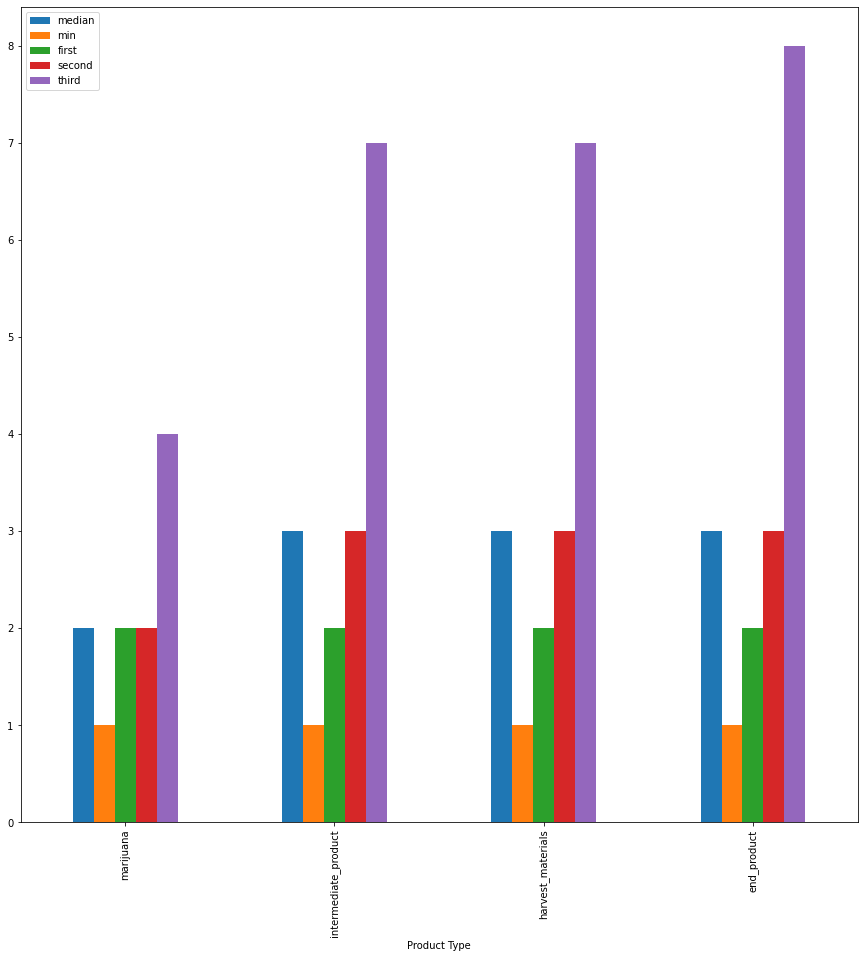

In [432]:
type_stats_df.plot(x='key', y = ['median', 'min', 'first', 'second', 'third'], kind = 'bar', figsize = (15,15), xlabel = 'Product Type');